# Introducción 

La empresa Zyfra es una empresa que se especializa en mejorar procesos en los sectores de minería, extracción de gas y petróleo, y requieren un modelo que pueda predecir las cantidades de oro obtenidas a partir del mineral extraido. El proceso tencnólico se basa en 4 etapas importantes, 1) Ingreso de mineral 2) Proceso de flotación 3) Primera purificación 4) Segunda purificación. Una vez entregados los datos de concentración de minerales en cada fase, es posible realizar una predicción de la concentración de oro en producto final. 

# Inicialización

In [1]:
import pandas as pd
from re import sub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Carga de datos

In [2]:
# Cargamos los datos
try:
    gold_train_df = pd.read_csv("/datasets/gold_recovery_train.csv")
    gold_test_df = pd.read_csv("/datasets/gold_recovery_test.csv")
    gold_full_df = pd.read_csv("/datasets/gold_recovery_full.csv")
except:
    gold_train_df = pd.read_csv("gold_recovery_train.csv")
    gold_test_df = pd.read_csv("gold_recovery_test.csv")
    gold_full_df = pd.read_csv("gold_recovery_full.csv")

In [3]:
# Visualizamos los datos
gold_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [186]:
gold_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [187]:
gold_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [188]:
gold_train_df.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
16859,2018-08-18 10:59:59,3.598375,11.737832,6.717509,46.299438,70.281454,8.406690,2.517518,10.652193,1.389434,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575


In [189]:
gold_test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [190]:
gold_full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


# Preparación de datos

In [191]:
# Reemplazamos el nombre de las columnas
gold_train_df.columns = gold_train_df.columns.str.replace('.', '_')

gold_test_df.columns = gold_test_df.columns.str.replace('.', '_')

gold_full_df.columns = gold_full_df.columns.str.replace('.', '_')


/tmp/ipykernel_27/2854078954.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gold_train_df.columns = gold_train_df.columns.str.replace('.', '_')
/tmp/ipykernel_27/2854078954.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gold_test_df.columns = gold_test_df.columns.str.replace('.', '_')
/tmp/ipykernel_27/2854078954.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gold_full_df.columns = gold_full_df.columns.str.replace('.', '_')


In [192]:
# Indexamos la fecha de cada conjunto
gold_train_df.set_index('date', inplace= True)
gold_test_df.set_index('date', inplace= True)
gold_full_df.set_index('date', inplace= True)

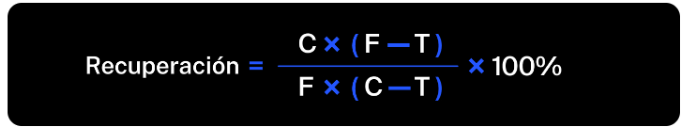

In [193]:
# Definimos una función para calcular la recuperación
def recovery_calculation(df, stage):
    if stage == 'rougher':
        c = df['rougher_output_concentrate_au']
        f = df['rougher_input_feed_au']
        t = df['rougher_output_tail_au']
    else:
        c = df['final_output_concentrate_au']
        f = df['rougher_output_concentrate_au']
        t = df['final_output_tail_au']
        
    calculation = ((c * (f - t))/(f * (c - t))) * 100
    
    return calculation

In [194]:
# Validamos el cálaculo de la recuperación de oro en la fase de flotación (rougher).

# Calculamos la recuperación del oro en la fase de flotación

gold_train_droped = gold_train_df.dropna()
recovery_calculated = recovery_calculation(gold_train_droped, 'rougher')

# Obtenemos la métrica EAM para evaluar los cálculos vs la recuperación del conjunto.

print(mean_absolute_error(gold_train_droped['rougher_output_recovery'], recovery_calculated))

9.460144184559453e-15


**Conclusiones:**

- La métrica EMA es sumamente pequeña eso quiere decir que el error con cada valor es despreciable, por lo tanto se considera que los valores coinciden y están bien calculados.

## Identificamos las características ausentes

In [195]:
columns_names_full = list(gold_full_df.columns.values)
columns_names_test = list(gold_test_df.columns.values)
full = set(columns_names_full)
test = set(columns_names_test)
missing_col = list(full - test)
missing_col.remove('rougher_output_recovery')
missing_col.remove('final_output_recovery')

**Conclusiones:**

- Las características que faltan en nuestro conjunto de prueba son las de salida de los procesos. 

In [196]:
# Eliminamos las columnas del conjunto de entranamiento las columnas faltantes del conjunto de prueba
gold_train_df = gold_train_df.drop(missing_col, axis= 1)

# Aumentamos el target a nuestro conjunto de prueba a partir de las datos de nuestro conjunto de entero.
gold_test_df = gold_test_df.join(gold_full_df[['rougher_output_recovery','final_output_recovery']], how= 'left')

print(gold_train_df.shape)
print(gold_test_df.shape)

(16860, 54)
(5856, 54)


## Tratamos los valores ausentes

In [208]:
# Ya que los valores son similares en la misma fecha se hará la imputación con el valor anterior de las características para el 
# cálculo de la recuperación.

gold_full_df['rougher_output_concentrate_au'] = gold_full_df['rougher_output_concentrate_au'].fillna(method= 'ffill')

gold_train_df['rougher_input_feed_au'] = gold_train_df['rougher_input_feed_au'].fillna(method= 'ffill')
gold_test_df['rougher_input_feed_au'] = gold_test_df['rougher_input_feed_au'].fillna(method= 'ffill')
gold_full_df['rougher_input_feed_au'] = gold_full_df['rougher_input_feed_au'].fillna(method= 'ffill')

gold_full_df['rougher_output_tail_au'] = gold_full_df['rougher_output_tail_au'].fillna(method= 'ffill')

gold_full_df['final_output_concentrate_au'] = gold_full_df['final_output_concentrate_au'].fillna(method= 'ffill')

gold_full_df['rougher_output_concentrate_au'] = gold_full_df['rougher_output_concentrate_au'].fillna(method= 'ffill')

gold_full_df['final_output_tail_au'] = gold_full_df['final_output_tail_au'].fillna(method= 'ffill')

In [209]:
# Calculamos las características rougher_output_recovery y final_output_recovery.


gold_full_df['rougher_output_recovery'] = recovery_calculation(gold_full_df, 'rougher')

gold_full_df['final_output_recovery'] = recovery_calculation(gold_full_df, 'final')

In [210]:
# Reemplazamos con el valor anterior los demás valores ausentes

gold_train_df = gold_train_df.fillna(method= 'ffill')
gold_test_df = gold_test_df.fillna(method= 'ffill')
gold_full_df = gold_full_df.fillna(method= 'ffill')

In [211]:
# Validamos los valores ausentes
print('Valores ausentes para el conjunto de entrenamiento: ', gold_train_df.isnull().sum().sum())
print('Valores ausentes para el conjunto de prueba: ', gold_test_df.isnull().sum().sum())
print('Valores ausentes para el conjunto entero: ', gold_full_df.isnull().sum().sum())

Valores ausentes para el conjunto de entrenamiento:  0
Valores ausentes para el conjunto de prueba:  0
Valores ausentes para el conjunto entero:  0


# Análisis de datos

## Concentrado de diferentes substancias en la purificación

In [212]:
# Generamos un dataframe con el promedio de concentración de cada compuesto en función del proceso de purificación.
concentrate_df = pd.DataFrame()
concentrate_df['index'] = ['before_primary_cleaner', 'before_secondary_cleaner', 'after_secondary_cleaner']
concentrate_df['Au'] = list(gold_full_df[['rougher_output_concentrate_au', 'primary_cleaner_output_concentrate_au', 'final_output_concentrate_au']].mean())
concentrate_df['Ag'] = list(gold_full_df[['rougher_output_concentrate_ag', 'primary_cleaner_output_concentrate_ag', 'final_output_concentrate_ag']].mean())
concentrate_df['Pb'] = list(gold_full_df[['rougher_output_concentrate_pb', 'primary_cleaner_output_concentrate_pb', 'final_output_concentrate_pb']].mean())

concentrate_df.set_index('index', inplace= True)

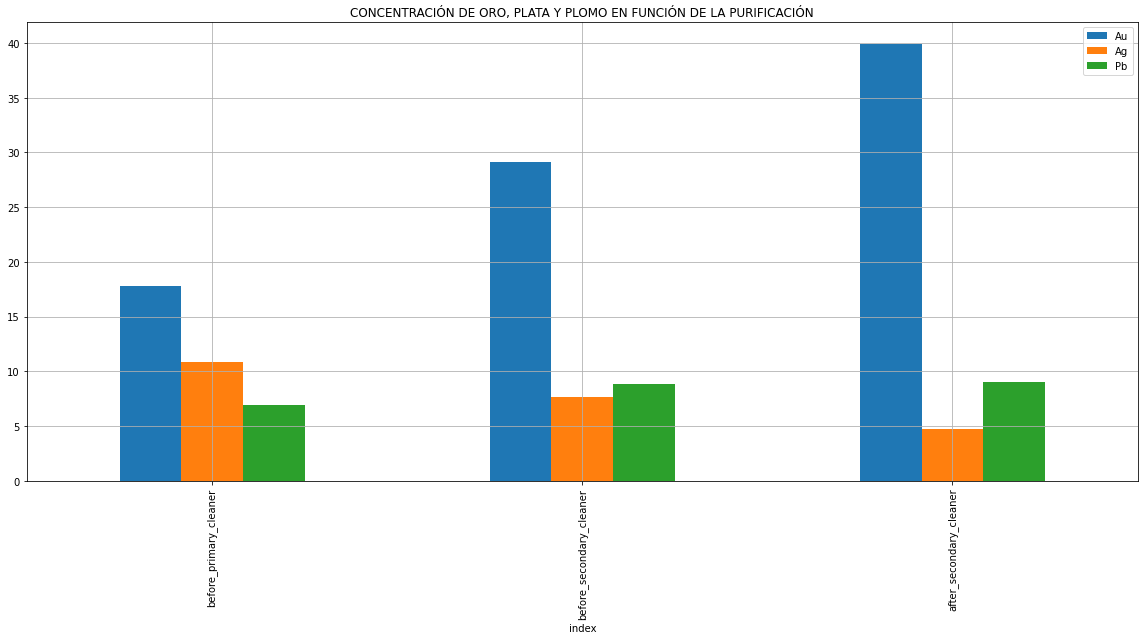

In [213]:
concentrate_df.plot(kind= 'bar', figsize= (16, 9), grid= True)
plt.title('CONCENTRACIÓN DE ORO, PLATA Y PLOMO EN FUNCIÓN DE LA PURIFICACIÓN')
plt.show()

**Conclusiones:**

- La concentración de oro en cada etapa de purificación aumenta, es lo ideal en el proceso de purificación, además la concentración de plata y plomo disminuye, si el propósito es obtener la mayor concentración de oro, el proceso está cumpliendo con su objetivo.

## Distribución del tamaño de las partículas en la fase de alimentación

<AxesSubplot:ylabel='Frequency'>

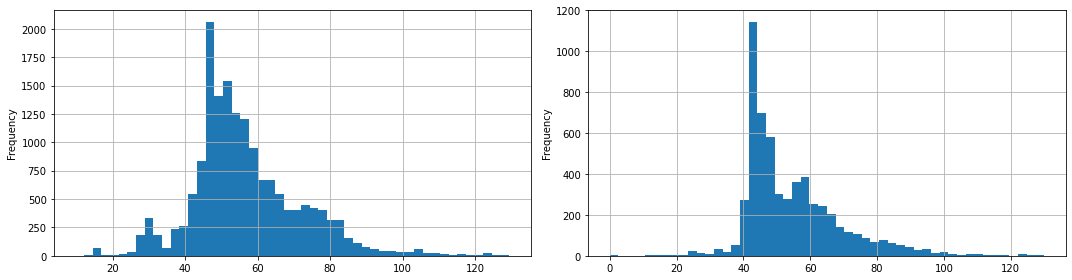

In [214]:
# Visualizamos la distribución del tamaño de partículoas en la alimentación.

plt.rcParams["figure.figsize"] = [10, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1,2)

gold_train_df.query('rougher_input_feed_size < 130')['rougher_input_feed_size'].plot(kind= 'hist', bins= 50, ax= axes[0], figsize= (15,4),grid= True)
gold_test_df.query('rougher_input_feed_size < 130')['rougher_input_feed_size'].plot(kind= 'hist', bins= 50, ax= axes[1],figsize= (15,4), grid= True)

**Conclusiones:**

- Ya que la mayoría de datos se encuentran en el rango de 40 y 50 se puede aceptar que las distribuciones son lo suficientemente iguales para no afectar el modelo.

## Distribuciones de diferentes sustancias en cada etapa

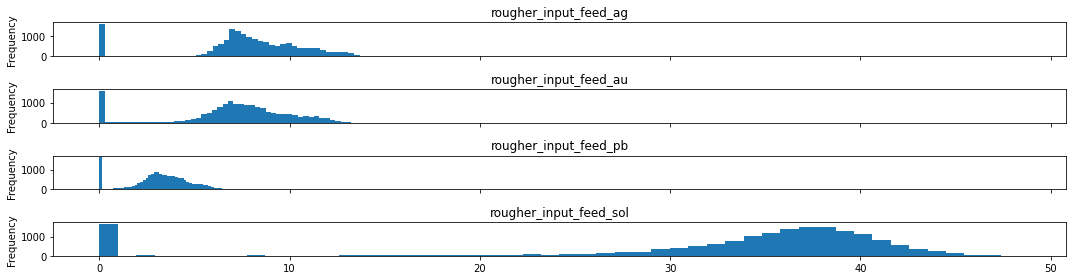

In [215]:
# Definimos las variables a anlizar

concentrated = ['rougher_input_feed_ag','rougher_input_feed_au','rougher_input_feed_pb','rougher_input_feed_sol']

# Visualizamos las distribuciones de las variables seliccionadas del conjunto de entrenamiento.

plt.rcParams["figure.figsize"] = [10, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(4,sharex=True)
k= 0
for i in range(4):
    gold_train_df[concentrated[k]].plot(kind= 'hist', figsize= (15,4), bins=50, ax= axes[i], title= concentrated[k])
    k += 1
 

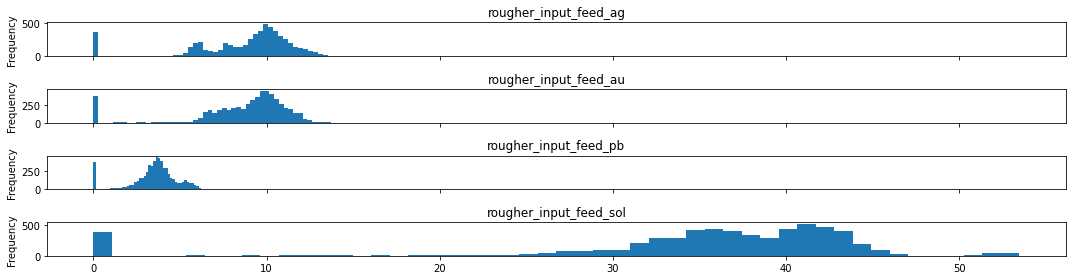

In [216]:
# Visualizamos las distribuciones de las variables seliccionadas del conjunto de entrenamiento.

plt.rcParams["figure.figsize"] = [10, 3.5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(4,sharex=True)
k= 0
for i in range(4):
    gold_test_df[concentrated[k]].plot(kind= 'hist', figsize= (15,4), bins=50, ax= axes[i], title= concentrated[k])
    k += 1

**Conclusiones:**

- Encontramos que en cada fase los compuestos analizados hay muchos registros con concentrados menor a 1, ya que estamos tratando de obtener oro eliminaremos de ambos conjuntos las concentraciones de oro menores a 1.

In [220]:
# Eliminamos en nuestros conjuntos los registros con 0 concentración de oro.
stages = ['rougher_input_feed_au']

for stage in stages:
    gold_train_df = gold_train_df[gold_train_df[stage] > 1]
    gold_test_df = gold_test_df[gold_test_df[stage] > 1]


# Definición del modelo

## Función para la métrica sMAPE

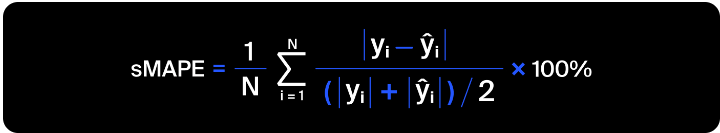

In [221]:
# Definimos una función para el cálculo de la métrica sMAPE

def smape(y_pred, y):
    nume = (y - y_pred).abs()
    deno = (y.abs() + y_pred.abs()) / 2
    res = sum((1/y.shape[0]) * (nume / deno)) * 100
    
    return res


In [274]:
# Definimos una función para realizar una validación cruzada con la métrica smape

def cross_validation(model, x, y, cv):
    scores = []
    sample_size = int(len(x)/cv)
    
    for i in range(0, len(x), sample_size+1):
        
        valid_indexes = list(range(i, i + sample_size))
        train_indexes = list(range(0, i)) + list(range(i + sample_size, len(x)))
       
        x_train = x.iloc[train_indexes]
        x_valid = x.iloc[valid_indexes]

        y_train = y.iloc[train_indexes]
        y_valid = y.iloc[valid_indexes]

        model = model
        model = model.fit(x_train, y_train)
        y_predictions = model.predict(x_valid)
        y_predictions = pd.Series(y_predictions, index= y_valid.index)
        score = smape(y_predictions, y_valid)

        scores.append(score)
    
    return sum(scores)/len(scores)
    

## Entrenamiento Linear Regression 

Para este modelo se tomará en cuenta las características en la fase de alimentación sin tomar en cuenta las variables utilizadas para calcular la recuperación, de esta manera evitamos la multicolinealidad.

In [272]:
# Definimos las características para el conjunto de rougher.
x_char_rougher = ['rougher_input_feed_ag', 'rougher_input_feed_pb', 'rougher_input_feed_sol', 'primary_cleaner_input_sulfate',
                 'primary_cleaner_input_depressant', 'primary_cleaner_input_feed_size', 'primary_cleaner_input_xanthate']

# Definimos las caractrísticas para el conjunto final.
x_char_final = ['rougher_input_feed_ag', 'rougher_input_feed_pb', 'rougher_input_feed_sol', 'primary_cleaner_input_sulfate',
                 'primary_cleaner_input_depressant', 'primary_cleaner_input_feed_size', 'primary_cleaner_input_xanthate']

In [275]:
# Definimos los conjuntos de datos para el entranmiento del modelo para la obtención del sMAPE de rougher.
model_lr = LinearRegression()

x_train = gold_train_df[x_char_rougher]
y_train = gold_train_df['rougher_output_recovery']
x_test = gold_test_df[x_char_rougher]
y_test = gold_test_df['rougher_output_recovery']

rougher_lr_smape = cross_validation(model_lr, x_train, y_train, 3)
print('El sMAPE de la recuperación rougher mediante un modelo de regresión lineal es: ', rougher_lr_smape)

# Definimos los conjuntos de datos para el entrenamiento del modelo para la obtención del sMAPE final
x_train = gold_train_df[x_char_rougher]
y_train = gold_train_df['final_output_recovery']
x_test = gold_test_df[x_char_rougher]
y_test = gold_test_df['final_output_recovery']

final_lr_smape = cross_validation(model_lr, x_train, y_train, 3)
print('El sMAPE de la recuperación final mediante un modelo de regresión lineal es: ', final_lr_smape)

sMAPE_rl_final = 0.25 * rougher_lr_smape + 0.75 * final_lr_smape
print('El sMape final es: ', sMAPE_rl_final)

El sMAPE de la recuperación rougher mediante un modelo de regresión lineal es:  13.224272676167468
El sMAPE de la recuperación final mediante un modelo de regresión lineal es:  11.913699450865543
El sMape final es:  12.241342757191024


## Entrenamiento Random Forest

In [276]:
# Definimos los conjuntos de datos para el entranmiento del modelo para la obtención del sMAPE de rougher.

best_depht = 0 
best_est = 0
best_smape = 100

for depth in range(15,20):
    for est in range(150,200,10):
            
        model_rf = RandomForestRegressor(max_depth= depth, n_estimators= est, random_state= 42)

        x_train = gold_train_df[x_char_rougher]
        y_train = gold_train_df['rougher_output_recovery']
        x_test = gold_test_df[x_char_rougher]
        y_test = gold_test_df['rougher_output_recovery']

        rougher_rf_smape = cross_validation(model_rf, x_train, y_train, 3)
#print('El sMAPE de la recuperación rougher mediante un modelo de regresión lineal es: ', rougher_lr_smape)

# Definimos los conjuntos de datos para el entrenamiento del modelo para la obtención del sMAPE final

        x_train = gold_train_df[x_char_final]
        y_train = gold_train_df['final_output_recovery']
        x_test = gold_test_df[x_char_final]
        y_test = gold_test_df['final_output_recovery']

        final_rf_smape = cross_validation(model_rf, x_train, y_train, 3)
#print('El sMAPE de la recuperación final mediante un modelo de regresión lineal es: ', final_lr_smape)

        sMAPE_rf_final = 0.25 * rougher_rf_smape + 0.75 * final_rf_smape
        
        if sMAPE_rf_final < best_smape:
            best_smape = sMAPE_rf_final
            best_depth = depth
            best_est = est
print('El sMape final es: ', best_smape)
print('Max_depth: ',depth)
print('n_estimators: ',est)

El sMape final es:  14.249479484247791
Max_depth:  19
n_estimators:  190


**Conclusiones:**

- Una vez realizado el entrenamiento con los modelos Linear Regression y Random Forest y evaluando la métrica sMAPE , hemos llegado a la conclusión de que el modelo de Regresión lineal nos da mejores resultados. Ya que tenemos un sMAPE de 12.2413 vs un 14.2494 del árbol aleatorerio.

# Conclusiones

Podemos observar que la relación entre las substancias de entrada con la concentración de oro obtenida es lineal, eso pudimos observar en en el análisis que realizamos en base a la concentración de horo después de cada fase, esta es la razón 